# Gradient Descent with a Loop

If y=f(x), what x gives us the minimum y?

In [19]:
from mystery import f, g, h
f(0)

6.361111111111111

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torch import tensor

plt.rcParams["font.size"] = 16

def plot_gradient(x, y, slope):
    for line in ax.get_lines():
        line.set_color("black")
        line.set_linewidth(1)
    ax.set_title("slope=%.2f" % slope)
    x, y, slope = map(float, (x, y, slope))
    dx = 0.5
    dy = dx*slope
    plt.plot([x-dx/2, x+dx/2], [y-dy/2, y+dy/2], linewidth=4, color="r")
    plt.scatter(x, y, s=100, c="k")

4.0692105547059345 3.1929263399957026


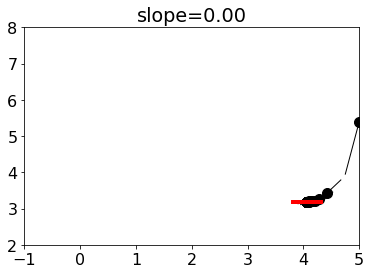

In [37]:
fig,ax = plt.subplots()
ax.set_xlim(-1, 5)
ax.set_ylim(2, 8)

def try_x(x):
    x = tensor(float(x)).requires_grad_()
    y = h(x)
    y.backward()
    plot_gradient(x, y, x.grad)
    return float(x.grad)

x = 5 # starting point might matter, if it's not convex
learning_rate = 0.1
for i in range(40): # TODO: stop when it seems we've found the best x
    grad = try_x(x)
    x -= grad * learning_rate
print(x, h(x)) # x=1.0785024568438533 y=3.7921893597383733

# Practice

0.9999999761581422 -0.9999999999999989


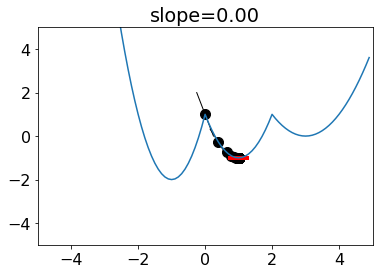

In [22]:
def f(x):
    if x < 0:
        return ((x - -1) ** 2) * 3 - 2
    if x > 2:
        return (x - 3) ** 2
    else:
        return ((x - 1) ** 2) * 2 - 1

def try_x(x):
    x = tensor(float(x)).requires_grad_()
    y = f(x)
    y.backward()
    plot_gradient(x, y, x.grad)
    return float(x.grad)

fig,ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

x = 0
learning_rate = 0.1

for i in range(40):
    grad = try_x(x)
    x -= grad * learning_rate
    
print(x, f(x))

ax.plot(np.arange(-5,5,0.1), [f(x) for x in np.arange(-5,5,0.1)])